# Initial Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Mean Squared Error: 0.24044511679937985
R-squared: 0.7835218769245862
                    Coefficient
Year                   0.476305
Kilometer             -0.091514
Engine                 0.078275
Length                 0.091746
Width                  0.054981
Height                 0.042429
Seating Capacity      -0.058567
Fuel Tank Capacity     0.131817
Max Power_bhp          0.422484
Max Power_rpm          0.039954
Max Torque_Nm         -0.033661
Max Torque_rpm        -0.135396
Owner                 -0.007342
Petrol                -0.008547
Manual                -0.119359
AWD                    0.023468
FWD                   -0.005175
RWD                   -0.007082


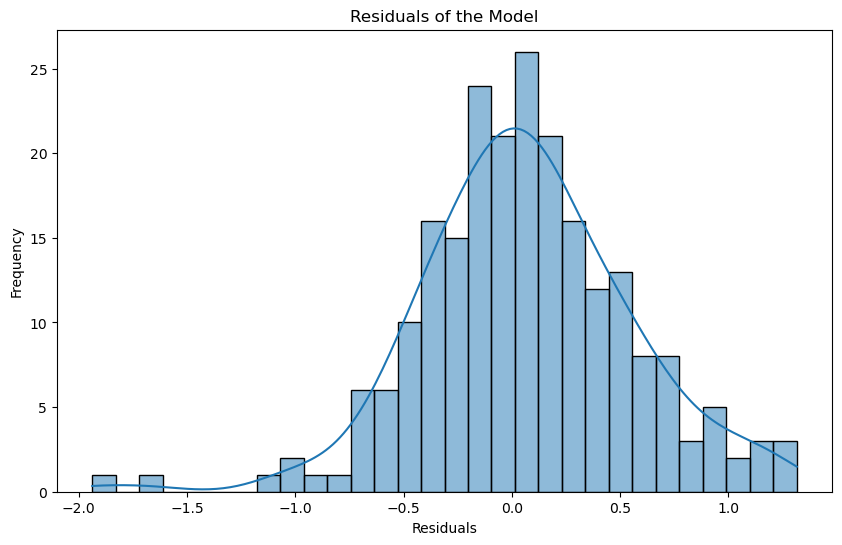

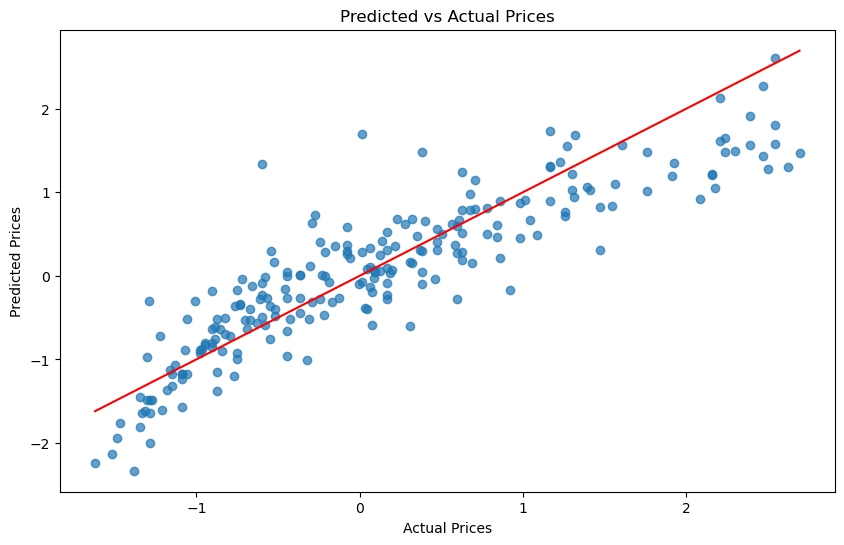

In [3]:
# Load the dataset
data = pd.read_csv("standarized_data.csv") 

for feature in data.columns.to_list():
    data[feature]= (data[feature] - data[feature].mean()) / data[feature].std()

# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals of the Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Model building \(forward stepwise regression\)

# Performing forward selection

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

# Perform forward stepwise regression on training data
sfs = SFS(lr,
          k_features='best',  # or a specific number of features
          forward=True,
          floating=False,
          scoring='r2',  # or another metric like 'neg_mean_squared_error'
          cv=5)  # Number of cross-validation folds

sfs = sfs.fit(X_train, y_train)

selected_feature_names = sfs.k_feature_names_

print("Selected feature names:", selected_feature_names)

Selected feature names: ('Year', 'Kilometer', 'Length', 'Fuel Tank Capacity', 'Max Power_bhp', 'Max Torque_rpm', 'Manual', 'AWD')


# building a model with the selected features

In [5]:
# Evaluate the model on the test set
X_train_selected = X_train[list(selected_feature_names)]
X_test_selected = X_test[list(selected_feature_names)]

lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)

# Example: Calculate the R^2 score on the test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set:", r2)

# You can also calculate other metrics like mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

R^2 score on test set: 0.7891455346052128
Mean Squared Error on test set: 0.23419884577370711


## Ploting residuals & prediction results

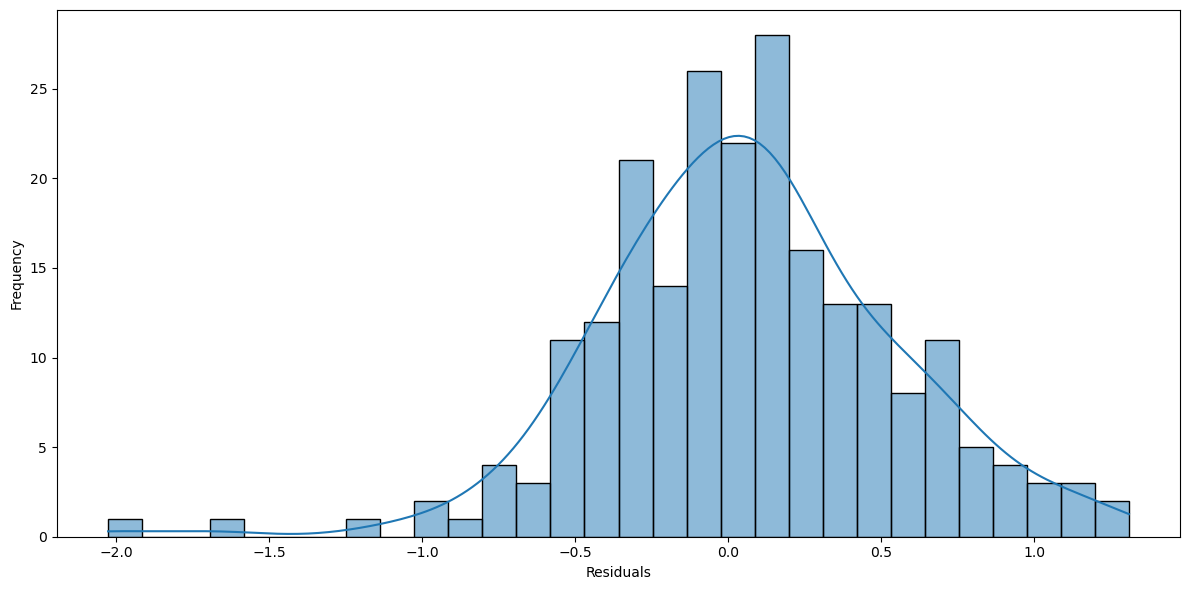

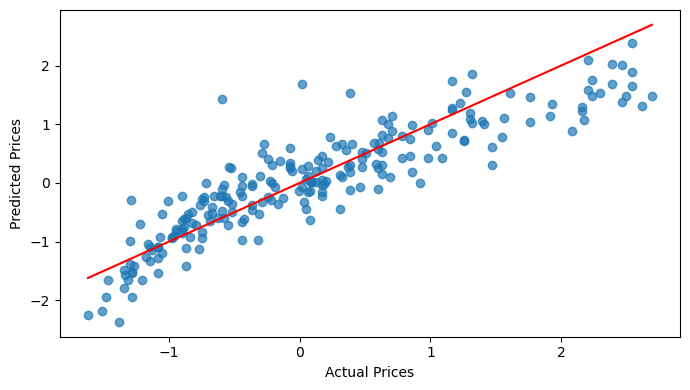

In [8]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('errors.png')
plt.show()

# Plotting predicted vs actual prices
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.savefig("predictions.png")
plt.show()


In [39]:
print(residuals.mean(),residuals.var())


0.059132736498186914 0.23173208562851438


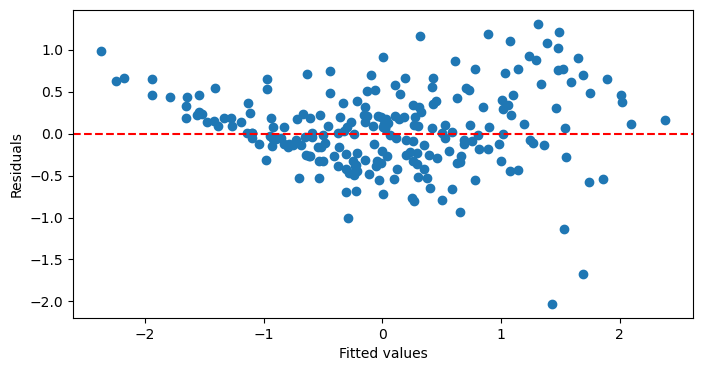

In [42]:
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.savefig('residual_variance.png')
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',  
          forward=True,
          floating=False,
          scoring='r2',  # or another metric like 'neg_mean_squared_error'
          cv=5)  # Number of cross-validation folds

sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices and names
selected_features = sfs.k_feature_idx_
selected_feature_names = sfs.k_feature_names_

print("Selected feature indices:", selected_features)
print("Selected feature names:", selected_feature_names)

# Evaluate the model on the test set
X_train_selected = X_train[list(selected_feature_names)]
X_test_selected = X_test[list(selected_feature_names)]

lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)

# Example: Calculate the R^2 score on the test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set:", r2)

# You can also calculate other metrics like mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

# Model Summary
X_train_selected_const = sm.add_constant(X_train_selected)
model = sm.OLS(y_train, X_train_selected_const).fit()
print(model.summary())

# VIF Analysis
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

print("VIF Analysis:")
print(vif_data)


Selected feature indices: (0, 1, 3, 7, 8, 11, 14, 15)
Selected feature names: ('Year', 'Kilometer', 'Length', 'Fuel Tank Capacity', 'Max Power_bhp', 'Max Torque_rpm', 'Manual', 'AWD')
R^2 score on test set: 0.7891455346052128
Mean Squared Error on test set: 0.23419884577370711
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     501.1
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.96e-323
Time:                        14:32:53   Log-Likelihood:                -492.89
No. Observations:                 898   AIC:                             1004.
Df Residuals:                     889   BIC:                             1047.
Df Model:                           8                                         
Covariance 

# fitting the model to normal data

In [9]:
data_2= pd.read_csv("cleaned_data.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = data_2.drop('Price', axis=1)
y = data_2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',  
          forward=True,
          floating=False,
          scoring='r2',  # or another metric like 'neg_mean_squared_error'
          cv=5)  # Number of cross-validation folds

sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices and names
selected_features = sfs.k_feature_idx_
selected_feature_names = sfs.k_feature_names_

print("Selected feature indices:", selected_features)
print("Selected feature names:", selected_feature_names)

# Evaluate the model on the test set
X_train_selected = X_train[list(selected_feature_names)]
X_test_selected = X_test[list(selected_feature_names)]

lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)

# Example: Calculate the R^2 score on the test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set:", r2)

# You can also calculate other metrics like mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

# Model Summary
X_train_selected_const = sm.add_constant(X_train_selected)
model = sm.OLS(y_train, X_train_selected_const).fit()
print(model.summary())

# VIF Analysis
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

print("VIF Analysis:")
print(vif_data)


Selected feature indices: (0, 1, 3, 7, 8, 11, 14, 15)
Selected feature names: ('Year', 'Kilometer', 'Length', 'Fuel Tank Capacity', 'Max Power_bhp', 'Max Torque_rpm', 'Manual', 'AWD')
R^2 score on test set: 0.7891455346052058
Mean Squared Error on test set: 24945595329.783554
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     501.1
Date:                Sun, 26 May 2024   Prob (F-statistic):          2.96e-323
Time:                        11:58:48   Log-Likelihood:                -11894.
No. Observations:                 898   AIC:                         2.381e+04
Df Residuals:                     889   BIC:                         2.385e+04
Df Model:                           8                                         
Covariance T